In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# Import datasets
link="C:/Users/msi/Desktop/M2_Data Science/Traitement du signal/KinectDataGreenhouse" # le lien des données de mon ordinateur

Box1_Temoin =pd.read_csv(link+"/Box1_Temoin.csv")
Box2_Stress_hydrique=pd.read_csv(link+"/Box2_Stress_hydrique.csv")
Box3_stress_salin=pd.read_csv(link+"/Box3_stress_salin.csv")
Box4_Temoin=pd.read_csv(link+"/Box4_Temoin.csv")

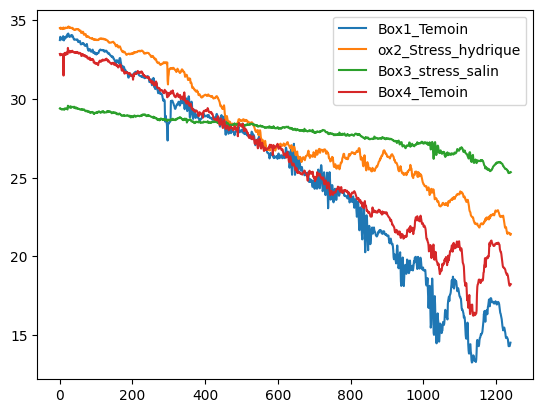

In [3]:
# plot of datasets
plt.plot(Box1_Temoin.X, Box1_Temoin.Y, label='Box1_Temoin')
plt.plot(Box2_Stress_hydrique.X, Box2_Stress_hydrique.Y, label='ox2_Stress_hydrique')
plt.plot(Box3_stress_salin.X, Box3_stress_salin.Y, label='Box3_stress_salin')
plt.plot(Box4_Temoin.X, Box4_Temoin.Y , label='Box4_Temoin')
plt.legend()
plt.show()

In [4]:
def devibyday(df):

    """
    Cette méthode effectue une régression sur des intervalles de 96 points consécutifs dans un dataset.
    
    Arguments :
    - dataset : Le dataset sur lequel effectuer la régression.
    
    Retourne :
    Un nouveau dataset avec 4 colonnes :
    - La première colonne : Les valeurs de l'axe X en minutes.
    - La deuxième colonne : Les valeurs de l'axe Y.
    - La troisième colonne : Les valeurs prédites Y_pred pour chaque intervalle de 0 à 96.
    - La quatrième colonne : Les résidus (Y - Y_pred) pour chaque intervalle de 0 à 96.
    """
    j=0
    Y_pred=[]
    for i in range(len(df)//96):
       
       modele = LinearRegression()     
       X=np.array(df["X"][j:j+96])
       Y=np.array(df["Y"][j:j+96])
       modele.fit(X.reshape(-1, 1), Y)
       y_pred=list(modele.predict(X.reshape(-1, 1)))
       Y_pred=Y_pred+y_pred
       j=j+96
    df=df.head((len(df)//96)*96)
    df["Y_pred"]=Y_pred
    df["Y_1"]=df["Y"]-df["Y_pred"]
    return df






In [5]:
def calculbyTrapz(df):

    """
    Cette méthode calcule les coefficients de Fourier par méthode des trapèzes,
    ainsi que les indicateurs HDR, Gr et l'énergie de Fourier sur des intervalles
    [i,i+96] consécutifs dans un dataset.
    
    Arguments :
    - dataset : Le dataset sur lequel effectuer les calculs.
    
    Retourne :
    Un nouveau dataset avec 4 colonnes :
    - La première colonne : Les valeurs de l'axe X en jours.
    - La deuxième colonne : Les valeurs de Gn (coefficients de Fourier) sur chaque jour.
    - La troisième colonne : Les valeurs de En (énergie de Fourier) sur chaque jour.
    - La quatrième colonne : Les valeurs de HDR (indicateur HDR) sur chaque jour.
    """


    
    
    Resultat = pd.DataFrame( {'Jour': [],'Gn': [],'En': [],'HDR': [] })
    T=96
    s=0
    for i in range(len(df)//96):
        coss=np.cos(2*np.pi*df.iloc[s:s+96, 0]/T)  #  La valeur de cos(2*pi*t/T) sur les intrevalles [i,i+96].
        sinn =np.sin(2*np.pi*df.iloc[s:s+96, 0]/T) # la valeur de sin(2*pi*t/T) sur les intrevalles [i,i+96].
        En_by_trapz=1/T*np.trapz(np.array(df.iloc[s:s+96,3])**2, np.array(df.iloc[s:s+96,0])) # le calcul de En par la fomule de trapèze sur chaque intervalle [i,i+96]

        an_by_trapz=2/T*np.trapz(np.array(df.iloc[s:s+96,3])*coss, np.array(df.iloc[s:s+96,0])) # le calcul de an par la fomule de trapze sur chaque intervalle [i,i+96]
        bn_by_trapz=2/T*np.trapz(np.array(df.iloc[s:s+96,3])*sinn, np.array(df.iloc[s:s+96,0])) # le calcul de bn par la fomule de trapze sur chaque intervalle [i,i+96]
        cn =np.sqrt(an_by_trapz**2+bn_by_trapz**2)      # le calcul de cn sur chaque intervalle [i,i+96]
        HDR=100*np.sqrt((En_by_trapz-0.5*cn**2)/(0.5*cn**2)) # le calcul de HDR sur chaque intervalle [i,i+96]
        Gn=np.sum(np.array(df.iloc[s:s+96,3])**2)  # le calcul de Gn  sur chaque  intervalle [i,i+96]

        # Créez une nouvelle ligne sous forme de dictionnaire
        new_row = {'Jour': int(i+1), 'Gn': Gn, 'En': En_by_trapz, 'HDR': HDR}
        
        new_df = pd.DataFrame([new_row])

        # Concatenate the original DataFrame and the new row
        Resultat = pd.concat([Resultat, new_df], ignore_index=True)
        s=s+96

    return Resultat

    
        


    
    





In [6]:


def plot_3D(df, title):
    

    """
    Cette méthode trace un graphe en 3D à partir d'un DataFrame donné.

    Arguments :
    - df : Le DataFrame contenant les données à afficher. Il doit avoir les colonnes "jours", "En", "Gn" et "HDR".
    - title : Le titre du graphe.

    Retourne :
    Aucun retour. La méthode affiche le graphe en 3D.
    """

     
    # Créez une figure et un axe 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Récupérez les données des colonnes du DataFrame
   
    Gn = df['Gn']
    En = df['En']
    HDR = df['HDR']
    # Créez un nuage de points 3D avec des couleurs différentes pour chaque colonne
    ax.scatter(Gn, En, HDR, c='b', marker='o', label='HDR')
    ax.scatter(Gn, HDR, En, c='g', marker='^', label='En')
    ax.scatter(HDR, En, Gn, c='r', marker='*', label='Gn')
    # Ajoutez des labels pour les axes
    ax.set_xlabel('Gn')
    ax.set_ylabel('En')
    ax.set_zlabel('HDR')

    # Affichez le plot 3D avec une légende
    ax.legend()
    plt.title(f"graphe de En, Gn et HDR en 3D de {title}")
    # Affichez le plot
    plt.show()


In [7]:
def resume(df, title):

    dff = devibyday(df)
    print(f"-------------------------------le graphe de signal et la regression sur chaque période {title}--------------------")
    
    plt.plot(df.X, df.Y, label= f'{title}')
    plt.plot(dff.X, dff.Y_pred, label=f'la regression sur chaque période')
   
    plt.legend()
    plt.show()
    print(f"-------------------------------le bruit de {title}--------------------")
    plt.plot(dff.X, dff.iloc[:,3], label='le bruit')
    plt.legend()
    plt.show()

    print(f"-------------------------------le graphe 3d de {title}--------------------")
    dff =calculbyTrapz(dff)
    plot_3D(dff, title)


### 1) Data analysis de  Box1_Temoin 

-------------------------------le graphe de signal et la regression sur chaque période Box1_Temoin --------------------


C:\Users\msi\AppData\Local\Temp\ipykernel_8040\2051513508.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_pred"]=Y_pred
C:\Users\msi\AppData\Local\Temp\ipykernel_8040\2051513508.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_1"]=df["Y"]-df["Y_pred"]


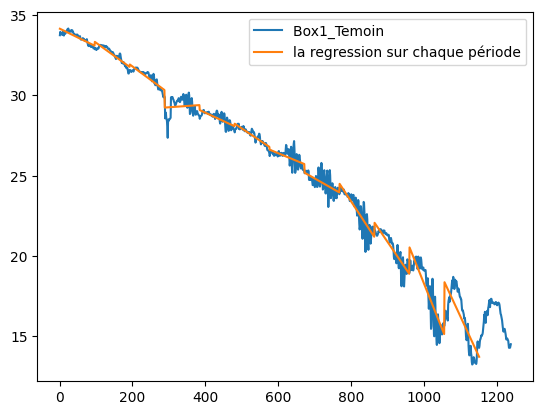

-------------------------------le bruit de Box1_Temoin --------------------


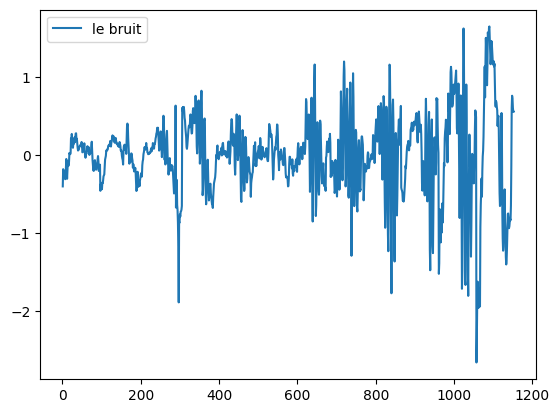

-------------------------------le graphe 3d de Box1_Temoin --------------------


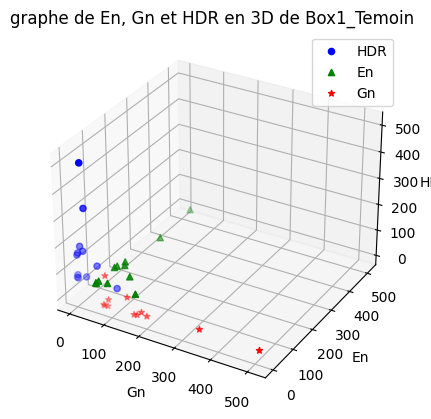

In [8]:
resume(Box1_Temoin, 'Box1_Temoin ' )


### 2) Data analysis de Box2_Stress_hydrique

-------------------------------le graphe de signal et la regression sur chaque période Box2_Stress_hydrique--------------------


C:\Users\msi\AppData\Local\Temp\ipykernel_8040\2051513508.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_pred"]=Y_pred
C:\Users\msi\AppData\Local\Temp\ipykernel_8040\2051513508.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_1"]=df["Y"]-df["Y_pred"]


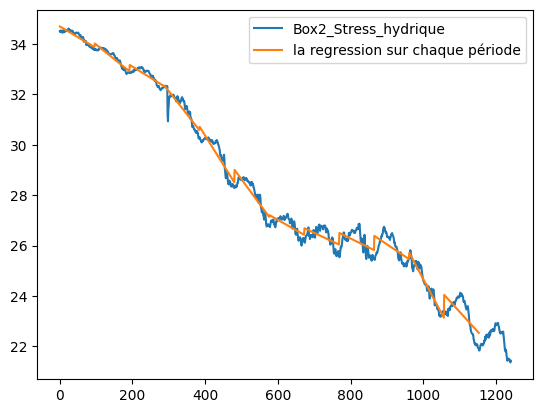

-------------------------------le bruit de Box2_Stress_hydrique--------------------


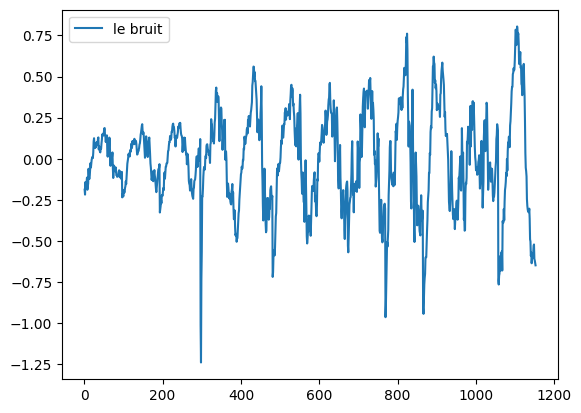

-------------------------------le graphe 3d de Box2_Stress_hydrique--------------------


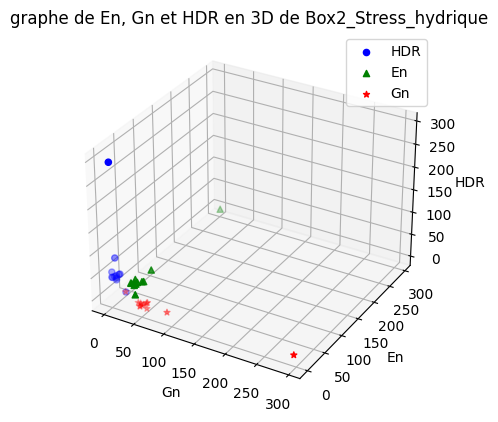

In [9]:
resume(Box2_Stress_hydrique, 'Box2_Stress_hydrique' )

### 3) Data analysis de Box3_stress_salin

-------------------------------le graphe de signal et la regression sur chaque période Box3_stress_salin--------------------


C:\Users\msi\AppData\Local\Temp\ipykernel_8040\2051513508.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_pred"]=Y_pred
C:\Users\msi\AppData\Local\Temp\ipykernel_8040\2051513508.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_1"]=df["Y"]-df["Y_pred"]


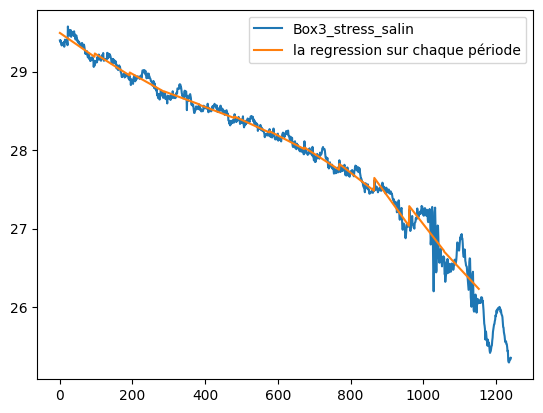

-------------------------------le bruit de Box3_stress_salin--------------------


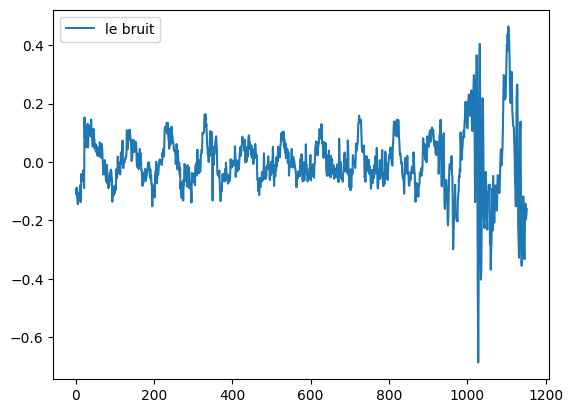

-------------------------------le graphe 3d de Box3_stress_salin--------------------


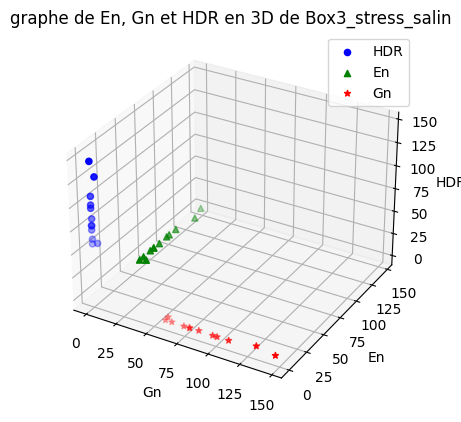

In [10]:
resume(Box3_stress_salin, 'Box3_stress_salin' )

### 4) Data analysis de Box4_Temoin

-------------------------------le graphe de signal et la regression sur chaque période Box4_Temoin --------------------


C:\Users\msi\AppData\Local\Temp\ipykernel_8040\2051513508.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_pred"]=Y_pred
C:\Users\msi\AppData\Local\Temp\ipykernel_8040\2051513508.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_1"]=df["Y"]-df["Y_pred"]


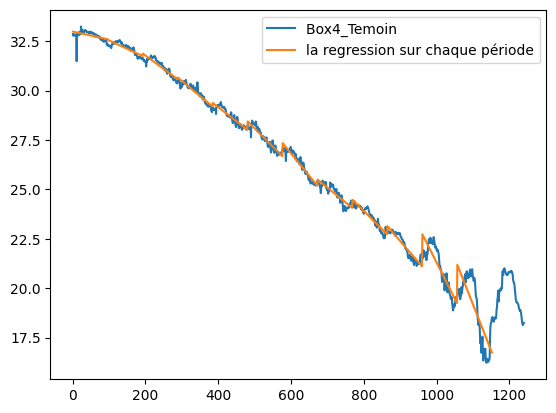

-------------------------------le bruit de Box4_Temoin --------------------


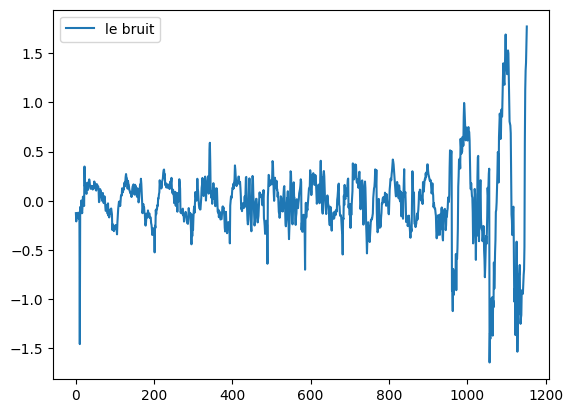

-------------------------------le graphe 3d de Box4_Temoin --------------------


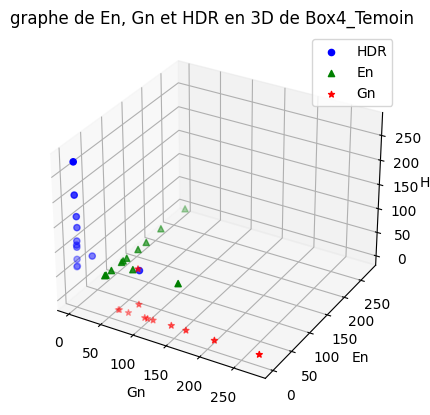

In [11]:
resume(Box4_Temoin, 'Box4_Temoin ' )